In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    '''生成 y = Xw + b + 噪声。'''
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b,1000)

In [3]:
print('features:',features[0], '\nlabel:', labels[0])

features: tensor([0.0147, 0.3130]) 
label: tensor([3.1812])


In [4]:
d2l.set_figsize()

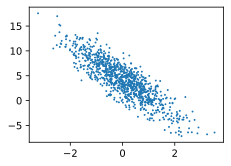

In [6]:
d2l.plt.scatter(features[:,1].detach().numpy(),
               labels.detach().numpy(), 1);

In [8]:
# 小批量特征函数和标签函数接收器
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size =10

for x, y in data_iter(batch_size, features, labels):
    print(x,'\n',y)
    break

tensor([[-1.0406, -1.4476],
        [-1.1151,  0.7266],
        [-0.5000,  0.0580],
        [ 0.3868, -0.4940],
        [ 1.1927, -3.2346],
        [-0.3402, -0.4735],
        [ 1.5506, -0.6587],
        [ 0.4220,  0.6812],
        [ 0.6486,  0.1988],
        [ 1.7210,  0.0679]]) 
 tensor([[ 7.0439],
        [-0.4935],
        [ 2.9956],
        [ 6.6602],
        [17.5689],
        [ 5.1319],
        [ 9.5251],
        [ 2.7252],
        [ 4.8146],
        [ 7.4142]])


In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [11]:
def linreg(x, w, b):
    '''线性回归模型'''
    return torch.matmul(x, w) + b

In [12]:
def squared_loss(y_hat, y):
    '''均方损失'''
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [13]:
def sgd(params, lr, batch_size):
    '''小批量随机梯度下降更新参数值'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [20]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        sgd((w, b), lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss {float(train_l.mean()):f}')

epoch1,loss 0.000048
epoch2,loss 0.000048
epoch3,loss 0.000048


In [23]:
print(true_w - w.reshape(true_w.shape))
print(true_b - b)

tensor([0.0005, 0.0004], grad_fn=<SubBackward0>)
tensor([-0.0001], grad_fn=<RsubBackward1>)


# 线性回归的简洁实现

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b,1000)

In [3]:
def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个PyTorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [4]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 2.2728, -1.0225],
         [-0.8973, -2.5881],
         [-0.0331,  1.1900],
         [ 0.1614,  0.5400],
         [-1.5394,  0.1433],
         [-0.1730, -0.2439],
         [ 0.0756,  0.4683],
         [ 0.4987, -1.6205],
         [-0.9237,  0.2756],
         [ 0.0323,  0.4269]]),
 tensor([[12.2316],
         [11.2256],
         [ 0.0883],
         [ 2.6821],
         [ 0.6323],
         [ 4.6893],
         [ 2.7567],
         [10.6947],
         [ 1.4229],
         [ 2.8109]])]

In [5]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [6]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [7]:
loss = nn.MSELoss()

In [8]:
trainer = torch.optim.SGD(net.parameters(),lr = 0.03)

In [10]:
num_epochs = 3
for epoch in range(num_epochs):
    for x, y in data_iter:
        l = loss(net(x), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch+1}, loss {l:f}')

epoch 1, loss 0.000203
epoch 2, loss 0.000098
epoch 3, loss 0.000098
